
Q3.(a)(b) GMM


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

# Load dataset
dataset = np.loadtxt('/Users/muzo01/Cpp_projects/gmm_data.txt')
# print(dataset.shape)
X1 = dataset[:, 0:2]
X2 = dataset[:, 2:4]
X3 = dataset[:, 3:]
# print(X3)

In [34]:
# Question3.(a): GMM
gmm = GaussianMixture(n_components=3, covariance_type='spherical', init_params='random').fit(dataset)
miu = gmm.means_
sigma = gmm.covariances_
pi = gmm.weights_
# print(miu.shape)

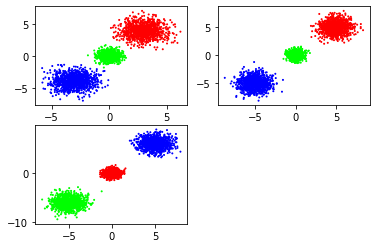

In [18]:
# Question3.(b):
gmm1 = GaussianMixture(n_components=3, covariance_type='spherical', init_params='random').fit(X1)
gmm2 = GaussianMixture(n_components=3, covariance_type='spherical', init_params='random').fit(X2)
gmm3 = GaussianMixture(n_components=3, covariance_type='spherical', init_params='random').fit(X3)
label1 = gmm1.predict(X1)
label2 = gmm2.predict(X2)
label3 = gmm3.predict(X3)
# print(label3)
# colors = ['b', 'g', 'r']
plt.figure()
plt.subplot(221)
plt.scatter(X1[:, 0], X1[:, 1], c=label1, cmap='brg_r', s=1)
plt.subplot(222)
plt.scatter(X2[:, 0], X2[:, 1], c=label2, cmap='brg_r', s=1)
plt.subplot(223)
plt.scatter(X3[:, 0], X3[:, 1], c=label3, cmap='brg_r', s=1)
plt.show()


3.(c) EM


In [38]:
n_clusters = 3
n_points = dataset.shape[0]
# print(n_points)
# W is the probability that each point belongs to each cluster
W = np.ones((n_points, n_clusters)) / n_clusters
# E step
p = np.zeros((n_points, n_clusters))
for i in range(n_clusters):
    for j in range(n_points):
        p[j, i] = pi[i] * multivariate_normal.pdf(dataset[j, :], miu[i], sigma[i])
W = p / p.sum(axis=1).reshape(-1, 1)
# print(miu[0])
# M step: estimate miu
miu_es = np.zeros((n_clusters, 5))
for i in range(n_clusters):
    miu_es[i] = np.average(dataset, axis=0, weights=W[:, i])
print(miu, '\n', miu_es)

[[-3.06176428e+00 -3.96696240e+00 -5.02048769e+00 -5.02021252e+00
  -6.00420335e+00]
 [ 1.05250251e-02  4.16618640e-03  1.35683863e-02  1.00207924e-02
  -2.47443547e-02]
 [ 2.99520441e+00  3.97929290e+00  4.93552594e+00  4.95000613e+00
   6.02926365e+00]] 
 [[-3.06176428e+00 -3.96696240e+00 -5.02048769e+00 -5.02021252e+00
  -6.00420335e+00]
 [ 1.05250251e-02  4.16618640e-03  1.35683863e-02  1.00207924e-02
  -2.47443547e-02]
 [ 2.99520441e+00  3.97929290e+00  4.93552594e+00  4.95000613e+00
   6.02926365e+00]]



3.(d)


In [39]:
# E step
W = np.ones((n_points, n_clusters)) / n_clusters
p = np.zeros((n_points, n_clusters))
for i in range(n_clusters):
    for j in range(n_points):
        p[j, i] = pi[i] * multivariate_normal.pdf(dataset[j, :], miu[i], sigma[i])
W = p / p.sum(axis=1).reshape(-1, 1)
# update pi
pi_u = np.zeros(3)
pi_u = W.sum(axis=0) / W.sum()
# M step: estimate miu
for i in range(n_clusters):
    miu_es[i] = np.average(dataset, axis=0, weights=W[:, i])
print(pi, '\n', pi_u)

[0.33333333 0.33333333 0.33333333] 
 [0.33333333 0.33333333 0.33333333]
